In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from plotly import graph_objs as go
from PIL import Image

In [170]:
dftrain = pd.read_csv('C:/Users/user/Desktop/IVY WORK BOOK/Kaggle submission/Tweet Sentiment Extraction/train.csv')
dftest = pd.read_csv('C:/Users/user/Desktop/IVY WORK BOOK/Kaggle submission/Tweet Sentiment Extraction/test.csv')

In [213]:
dftrain.head(30)

,textID,text,selected_text,sentiment,sentiment_value,process_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,2,"I`d have responded, if I were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0,sooo sad i will miss you here in san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,0,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0,sons of why couldn t they put them on the rel...
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,2,http://www.dothebouncy.com/smf - some shameles...
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,1,2am feedings for the baby are fun when he is a...
7,50e14c0bb8,Soooo high,Soooo high,neutral,2,Soooo high
8,e050245fbd,Both of you,Both of you,neutral,2,Both of you
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,1,journey wow u just became cooler hehe is that...


In [172]:
dftrain=dftrain.dropna()
dftrain=dftrain.drop_duplicates()

In [173]:
dftest

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive


In [306]:
dftest=dftest.dropna()
dftest=dftest.drop_duplicates()

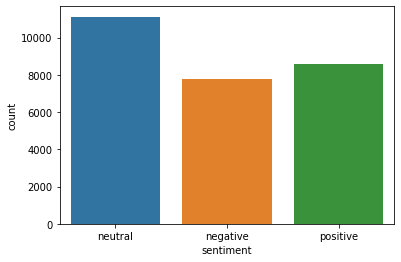

In [174]:
sns.countplot(x='sentiment',data=dftrain)

In [307]:
def positive_neutral(inpdata):
    if(inpdata=='positive'):
        return(1)
    elif(inpdata=='negative'):
        return(0)
    else:
        return(2)  

In [176]:
dftrain['sentiment_value']=dftrain['sentiment'].apply(positive_neutral)

In [308]:
dftest['sentiment_value']=dftest['sentiment'].apply(positive_neutral)

In [354]:
def text_preprocess(inpdata1,inpdata2):
    import re
    if(inpdata2==2):
        return(inpdata1)
    else:
        cleanedArticle1=re.sub(r'[?|$|(),"".@#=><|!]Â&*/',r' ',inpdata1)
        cleanedArticle2=re.sub(r'[^a-z A-Z 0-9]',r' ',cleanedArticle1)
        cleanedArticle3=cleanedArticle2.lower()
        #cleanedArticle4=re.sub(r'\b\w{1,1}\b', ' ',cleanedArticle3)
        cleanedArticle4=re.sub(r'https?://\S+|www\.\S+',r' ',cleanedArticle3)
        cleanedArticle5=re.sub(r' +', ' ',cleanedArticle4)
        return(cleanedArticle5)

In [212]:
for i in range (0, len(dftrain)):
    dftrain['process_text'].iloc[i]=text_preprocess(dftrain['text'].iloc[i],dftrain['sentiment_value'].iloc[i])

###Blank

In [355]:
for j in range (0, len(dftest)):
      dftest['process_text'].iloc[j]=text_preprocess(dftest['text'].iloc[j],dftest['sentiment_value'].iloc[j])


In [457]:
dftest.head(60)

,textID,text,sentiment,sentiment_value,process_text,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,2,Last session of the day http://twitpic.com/67ezh,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,1,shanghai is also really exciting precisely sk...,really
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,0,recession hit veronique branquinho she has to ...,None
3,01082688c6,happy bday!,positive,1,happy bday,happy
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,1,http twitpic com 4w75p i like it,None
5,726e501993,that`s great!! weee!! visitors!,positive,1,that s great weee visitors,great
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,negative,0,i think everyone hates me on here lol,None
7,afa11da83f,"soooooo wish i could, but im in school and my...",negative,0,soooooo wish i could but im in school and mys...,None
8,e64208b4ef,and within a short time of the last clue all ...,neutral,2,and within a short time of the last clue all ...,and within a short time of the last clue all ...
9,37bcad24ca,What did you get? My day is alright.. haven`...,neutral,2,What did you get? My day is alright.. haven`...,What did you get? My day is alright.. haven`...


In [453]:
dftest['selected_text']=dftest['textID']

###Blank

In [454]:
def simple_text_blob(inpdata1,inpdata2):
    from textblob import TextBlob
    if(inpdata2==2):
        return(inpdata1)
    elif(inpdata2==1):
        blob=TextBlob(inpdata1)
        inp=blob.tokenize()
        for word in inp:
            if(TextBlob(word).polarity>0):
                return(word)
    else:
        blob=TextBlob(inpdata1)
        inp=blob.tokenize()
        for word in inp:
              if(TextBlob(word).polarity<0):
                return(word) 

In [455]:
for j in range(0,len(dftest)):
    dftest['selected_text'].iloc[j]=simple_text_blob(dftest['process_text'].iloc[j],dftest['sentiment_value'].iloc[j])

In [ ]:
#for j in range(0,len(dftrain)):
    #dftrain['selected_text'].iloc[j]=simple_text_blob(dftrain['text'].iloc[j],dftrain['sentiment_value'].iloc[j])

In [422]:
dftrain[['process_text','Sel_text','selected_text','sentiment_value']].tail(50)

,process_text,Sel_text,selected_text,sentiment_value
27431,"Aaaah, the same old same, I see ^^ We share a...","Aaaah, the same old same, I see ^^ We share a...","Aaaah, the same old same, I see ^^ We share a ...",2
27432,Mmmmmm.... Coffee...,Mmmmmm.... Coffee...,Mmmmmm.... Coffee...,2
27433,at least they kids havnt gotten to big to stil...,AWWW,AWWW they are so sweet. I am so lucky to have ...,1
27434,really good night,Really,Really good night,1
27435,back from cycling 20 miles on virtually traffi...,free,great start,1
27436,hi all i have 2 daughters and my youngest turn...,None,sniffle sniffle sob. sob.,0
27437,I would never do such a thing! The only thin...,I would never do such a thing! The only thin...,I would never do such a thing! The only thing...,2
27438,where is my bestie when i need him,None,Where is my bestie when i need him,0
27439,i am beginning to think sun blcok is a haox,None,haox.,0
27440,i get it you esplained it to me awhile ago,None,I GET IT.,0


In [249]:
dftrain=dftrain.drop('Sel_text', axis=1)

In [112]:
dftrain.shape

(27481, 6)

In [459]:
sample_df=pd.DataFrame(dftest,columns=['textID','selected_text'])

In [460]:
sample_df.to_csv('sample_df.csv')